In [2]:
from my_weapon import *
from IPython.display import display
from tqdm import tqdm_notebook as tqdm
import matplotlib
from datetime import datetime
from fake_identify import Are_you_IRA
from SQLite_handler import find_name

Putin = Are_you_IRA()

sns.set(style="darkgrid", font_scale=1.5)
sns.set_palette("coolwarm", 8)
ira_c = sns.color_palette("coolwarm", 10)[9]
all_c = sns.color_palette("coolwarm", 10)[0]

## IRA as influencers

分析IRA是不是影响力比较大的节点

In [2]:
# 方向 both undir out in

import graph_tool.all as gt
from pprint import pprint

def build_CI_rank(graph_file):
    rst = {}
    print(f"------------------{graph_file}------------------")
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print(f"Top 25 out:")
    pprint(st_user_CI[:25])
    
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank

    user_CI = {g.vp.id[v]: g.vp.CI_in[v] for v in g.vertices()}
    rst["in_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print("Top 25 in:")
    pprint(st_user_CI[:25])
    
    rst["in_id"] = st_user_CI
    rst["in_rank"] = rank

    if graph_file.endswith("IRA_two_layers.gt"):
        user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
        rst["undir_CI"] = user_CI
        st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
        rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
#         print("Top 10 undir:")
#         pprint(st_user_CI[:10])

        rst["undir_id"] = st_user_CI
        rst["undir_rank"] = rank
    
    
#     user_CI = {g.vp.id[v]: g.vp.CI_undir[v] for v in g.vertices()}
#     rst["undir_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["undir_id"] = st_user_CI
    
#     user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
#     rst["both_CI"] = user_CI
#     st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
#     rst["both_id"] = st_user_CI


    
    return rst

In [3]:
def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True, scale=False):
    if scale:
        data = data.apply(np.log10)
    
    if maxi == 0:
        maxi = data.max()
    if step == 0:
        try:
            step = int((maxi - mini) / 50)
            if step == 0:
                step = 1
        except:
            step = 1
            
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    x = pd.Series(x)
    cdf = pd.Series(cdf)
    pdf = pd.Series(pdf)
    
    return x, cdf, pdf

In [200]:
labels = [
    "fake",
    "extreme bias (right)",
    "right",
    "right leaning",
    "center",
    "left leaning",
    "left",
    "extreme bias (left)",
    "local",
]

# all_users = pd.read_csv("data/all-users-mbfc.csv", index_col="user_id", dtype={"user_id": str})
users = pd.read_csv("data/all-users.csv", index_col="user_id",
                    usecols =["user_id", "is_IRA"], dtype={"user_id": str, "is_IRA": int})
IRA_users = users[users.is_IRA > 0]
print(len(IRA_users))

360


In [ ]:
IRA_user_list = []
for u in IRA_users.index:
    if u in reversed_ira_map:
        IRA_user_list.append(reversed_ira_map[u])
    else:
        IRA_user_list.append(u)

json.dump(IRA_user_list, open("bingo_IRA_users.json", "w"))

In [101]:
ira_map = json.load(open("data/IRA_map.json"))

In [102]:
reversed_ira_map = {v: k for k, v in ira_map.items() if len(k) == 64}

------------------disk/network/fake.gt------------------
Top 10 out:
[('18643437', 17124306472),
 ('109065990', 15613472764),
 ('18856867', 13178750472),
 ('14669951', 11321630328),
 ('17980523', 10921818258),
 ('25073877', 10013443176),
 ('19211550', 9839434322),
 ('707278892801765377', 8958595140),
 ('825501626', 8881062705),
 ('4831603043', 8413322412)]
Top 10 in:
[('711393889731657732', 210375693),
 ('3321952723', 78977860),
 ('2545326607', 73945340),
 ('905898240', 63231123),
 ('173119648', 58203000),
 ('884311340', 55014102),
 ('1418775942', 53832917),
 ('714947334', 53427181),
 ('48866739', 53367120),
 ('404463989', 52530374)]
------------------disk/network/extreme bias (right).gt------------------
Top 10 out:
[('25073877', 39296229588),
 ('39308549', 32627052909),
 ('457984599', 26613250755),
 ('16589206', 23551250226),
 ('14669951', 19601072934),
 ('41634520', 19135455066),
 ('282695161', 19000511026),
 ('347627434', 14108794320),
 ('17980523', 12219797376),
 ('39344374', 1141

fake_out                      186/207591
fake_in                        21/207591
extreme bias (right)_out      249/267918
extreme bias (right)_in         4/267918
right_out                     195/381786
right_in                        2/381786
right leaning_out             395/254312
right leaning_in                2/254312
center_out                    561/975548
center_in                     108/975548
left leaning_out            1118/1196330
left leaning_in              617/1196330
left_out                     1893/587617
left_in                       942/587617
extreme bias (left)_out       3757/83672
extreme bias (left)_in        6268/83672
local_out                      154/96229
local_in                        12/96229
dtype: object

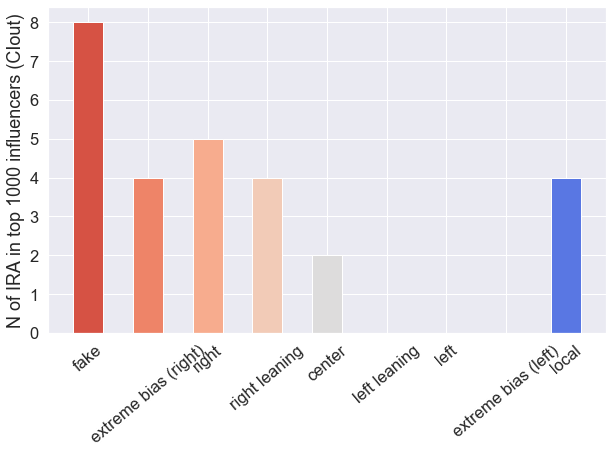

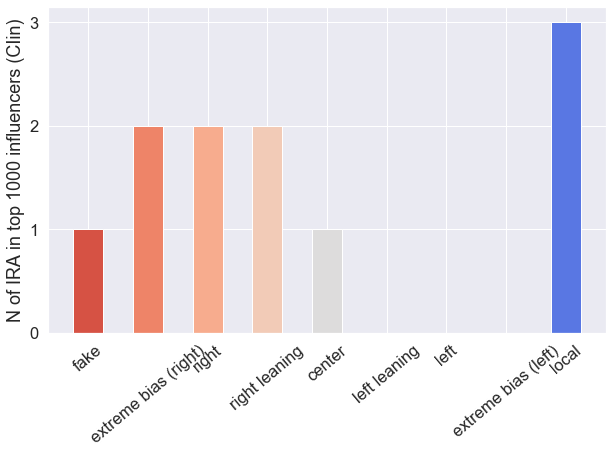

In [201]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

for label in tqdm(labels):
    # print(label, "...")
    rst = build_CI_rank("disk/network/{}.gt".format(label))
    
    for dire in ["out", "in"]:
        # print(label, dire, "...")
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]
        ira_rank = {}
        # top list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        for user_id, row in IRA_users.iterrows():
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
            except:
                pass
            
        # print(f"---- IRA rank ---- {label} {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_10_users[f"{label}_{dire}"] = ira_rank[:10]
        
        len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
        # print("参与人数：", len(IRA_CI), len(sort_user_CI))
        IRA_CI = pd.Series(IRA_CI)
        IRA_CI_sum = IRA_CI.sum()
        
        # 总体排名
        # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
        for i, d in enumerate(rst[dire + "_id"]):
            if IRA_CI_sum >= d[1] :
                break
        dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"

        non_CI = pd.Series([v for u, v in user_CI.items() if u not in ira_rank])
        all_CI = pd.Series(list(user_CI.values()))

        IRA_CI_mean = IRA_CI.mean()
        all_CI_mean = all_CI.mean()
        non_CI_mean = non_CI.mean()

        dict_CI[label][dire + "_IRA"] = IRA_CI_mean
        dict_CI[label][dire + "_All users"] = all_CI_mean
        dict_CI[label][dire + "_non_IRA"] = non_CI_mean
        
        dict_CI[label][dire + "_IRA dist"] = IRA_CI
        dict_CI[label][dire + "_All dist"] = all_CI
        dict_CI[label][dire + "_non dist"] = non_CI

        
# print(dict_CI)
compare_CI_value = pd.DataFrame(dict_CI).transpose()
# compare_CI_value
display(pd.Series(dict_ira_rank))


# Top 1000
def plot_corr(cor, dire):
    # display(cor)
    plt.figure(figsize=(10, 6))
    x = range(len(labels))
    for i in x:
        plt.bar(i, cor[dire + "_" + labels[i]], width=0.5, 
                  color=sns.color_palette("coolwarm", len(labels))[len(labels) - 1 - i])
    plt.xticks(x, labels, rotation=40)

    if dire == "in":
        plt.yticks(range(4))
        
    plt.ylabel(f'N of IRA in top {top_num} influencers (CI{dire})'.format(top_num))
    plt.savefig("fig/size-of-inter-{}-{}.pdf".format(top_num, dire),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.tight_layout()
    plt.close()

# for dire in ["out", "undir", "both", "in"]:
for dire in ["out", "in"]:
    plot_corr(len_intersection, dire)


# from scipy.stats import ks_2samp

# # for dire in ["out", "undir", "both", "in"]:
# for dire in ["out", "in"]:
#     ax = plt.figure(figsize=(10, 6))
#     plt.ylabel("Average CI score")
#     compare_CI_value[dire + "_IRA"].plot.bar(width=0.3, position=1.1, 
#                                      color=ira_c, label="IRA")
#     compare_CI_value[dire + "_non_IRA"].plot.bar(width=0.3, position=-0.1, 
#                                      color=all_c, label="non-IRA")
    
#     print(compare_CI_value[dire + "_IRA"])
#     print(compare_CI_value[dire + "_non_IRA"])
    
#     # 显著性检验    
#     _ticks = []
#     for label in labels:
#         d = dict_CI[label]
#         pvalue = ks_2samp(d[dire + "_IRA dist"], d[dire + "_non dist"])[1]
#         print(label, dire, "pvalue = {:.3f}".format(pvalue))
#         if pvalue < 0.001:
#             _ticks.append(label + "\n p<0.001***")
#         elif pvalue < 0.01:
#             _ticks.append("{}\n p={:.3f}**".format(label, pvalue))
#         elif pvalue < 0.05:
#             _ticks.append("{}\n p={:.3f}*".format(label, pvalue))
#         else:
#             _ticks.append("{}\n p>0.05".format(label))
    
#     plt.xticks(range(len(labels)), _ticks, rotation=40, fontsize=12)
#     plt.xlim(-1, len(labels))
#     plt.legend()

#     plt.tight_layout()
#     plt.savefig("fig/CI_{}.pdf".format(dire), dpi=300, bbox_inches='tight')
#     plt.show()
#     plt.close()

## 两层交互网络（未划分社团）

In [7]:
G = nx.read_gpickle("data/IRA-two-layers.gpickle")
IRA_users = [n for n in G.nodes() if G.node[n]["IRA"] == 1]
len(IRA_users)

510

In [211]:
top_num = 100

len_intersection = {}
dict_CI = defaultdict(dict)
top_10_users = {}

rst = build_CI_rank("data/IRA_two_layers.gt")

for dire in ["out", "in", "undir"]:
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    
    # top 100 list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    ira_rank = {}
    for user_id in IRA_users:
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
            # print(user_id, rank[user_id])
        except:
            pass

    # print(f"---- IRA rank ---- {label} {dire}")
    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[dire] = ira_rank[:10]


    len_intersection[dire] = len(set_CI_users & set_source_users)
    

from pprint import pprint
pprint(len_intersection)
pprint(top_10_users)

------------------data/IRA_two_layers.gt------------------
Top 25 out:
[('4224729994', 172612652250),
 ('274891222', 129275984000),
 ('4272870988', 114675165760),
 ('4218156466', 105542500816),
 ('710990834972233728', 94809306592),
 ('1367531', 92848353048),
 ('347627434', 88280598912),
 ('16589206', 87002488287),
 ('33529092', 82434955036),
 ('78523300', 75008398640),
 ('216776631', 73659670092),
 ('759251', 73405914054),
 ('197496309', 72482714172),
 ('3284112337', 69117844488),
 ('282695161', 67761529836),
 ('466144416', 66858562687),
 ('1339835893', 66418217072),
 ('39344374', 64309558968),
 ('26487169', 62809482449),
 ('4236806414', 61592078893),
 ('4261318354', 60832392040),
 ('393190233', 60071900824),
 ('1075681177', 59764210688),
 ('1536791610', 59074422600),
 ('3677742792', 59053597825)]
Top 25 in:
[('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 50067629

In [222]:
top_users = [('4224729994', 172612652250),
             ('274891222', 129275984000),
             ('4272870988', 114675165760),
             ('4218156466', 105542500816),
             ('710990834972233728', 94809306592),
             ('1367531', 92848353048),
             ('347627434', 88280598912),
             ('16589206', 87002488287),
             ('33529092', 82434955036),
             ('78523300', 75008398640),
             ('216776631', 73659670092),
             ('759251', 73405914054),
             ('197496309', 72482714172),
             ('3284112337', 69117844488),
             ('282695161', 67761529836),
             ('466144416', 66858562687),
             ('1339835893', 66418217072),
             ('39344374', 64309558968),
             ('26487169', 62809482449),
             ('4236806414', 61592078893),
             ('4261318354', 60832392040),
             ('393190233', 60071900824),
             ('1075681177', 59764210688),
             ('1536791610', 59074422600),
             ('3677742792', 59053597825)]

top_users_in = [('1679279490', 25639761996),
 ('3376927462', 15888574484),
 ('1671234620', 10196727984),
 ('758683522118791168', 6215935310),
 ('1662779209', 5193542025),
 ('2606301939', 5006762970),
 ('2671070290', 4992389550),
 ('1661246144', 4849513384),
 ('3438999494', 4550574708),
 ('2491081213', 4518696113),
 ('29350302', 4353767660),
 ('2545326607', 4069558080),
 ('2882013788', 3892137998),
 ('552335271', 3772931400),
 ('1400514948', 3697138440),
 ('247558666', 3543471481),
 ('2535166748', 3515293392),
 ('3408262787', 3464381004),
 ('3083844539', 3353930050),
 ('2341977604', 3204744920),
 ('19921268', 3190017068),
 ('2980186012', 3072018600),
 ('3321952723', 3069986339),
 ('1629828379', 3050324005),
 ('714947334', 2922985676)]


from SQLite_handler import find_name
from fake_identify import Are_you_IRA

Putin = Are_you_IRA()

for u in top_users:
    if Putin.fuck(u[0]):
        _u = find_name(u[0])[6]
        if _u and Putin.fuck(u[0]):
            print(find_name(u[0])[6], "√")
        else:
            print(find_name(u[0])[6])

@TEN_GOP √
@bfraser747
@Pamela_Moore13 √
@America_1st_ √
@Always_Trump
@FoxNews
@LindaSuhler
@wikileaks
@SandraTXAS
@RealJamesWoods
@BernieSanders
@CNN
@FrankLuntz
@WeNeedTrump
@WayneDupreeShow
@TrumpSuperPAC
@HillaryClinton
@DonaldJTrumpJr
@LouDobbs
@JohnKStahlUSA
@Stevenwhirsch99
@LeahR77
@2ALAW
@POTUS
@immigrant4trump


## 三个主要社团中的CI

In [6]:
# 方向 both undir out in

import graph_tool.all as gt
from pprint import pprint

def noin_build_CI_rank(graph_file):
    rst = {}
    print(f"------------------{graph_file}------------------")
    g = gt.load_graph(graph_file)
    user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
    rst["out_CI"] = user_CI
    st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)
    rank = {d[0]: i + 1 for i, d in enumerate(st_user_CI)}
    print(f"Top 100 out:")
    # pprint(st_user_CI[:100])
    
    rst["out_id"] = st_user_CI
    rst["out_rank"] = rank
    rst["top50"] = st_user_CI[:50]
    return rst

In [7]:
uid_name = {}
for line in open("data/profile.txt"):
    d = json.loads(line.strip())
    uid_name[d["id_str"]] = d["screen_name"]
    
for line in open("/home/alex/kayzhou/tweets-collection-Argentina-election/data/user_profile/2019-07-25-.txt"):
    d = json.loads(line.strip())
    uid_name[d["id_str"]] = d["screen_name"]

In [14]:
top_num = 100
Putin = Are_you_IRA()    

for i in range(1, 4):
    len_intersection = {}
    dict_CI = defaultdict(dict)
    top_10_users = {}

    rst = noin_build_CI_rank(f"data/graph/C{i}-two-layer.gt")
    G = nx.read_gpickle(f"data/graph/C{i}-two-layer.gpickle")
    print(G.number_of_nodes(), G.number_of_edges())
    IRA_users = set([n for n in G.nodes if Putin.check(n)])

    for dire in ["out"]:
        user_CI = rst[dire + "_CI"]
        rank = rst[dire + "_rank"]

        # top 100 list
        set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

        set_source_users = set()
        IRA_CI = []
        ira_rank = {}
        for user_id in IRA_users:
            set_source_users.add(user_id)
            try:
                IRA_CI.append(user_CI[user_id])
                ira_rank[user_id] = rank[user_id]
                # print(user_id, rank[user_id])
            except:
                pass

        # print(f"---- IRA rank ---- {label} {dire}")
        ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
        top_10_users[dire] = ira_rank[:10]


        len_intersection[dire] = len(set_CI_users & set_source_users)

    from pprint import pprint
    pprint(len_intersection)
    pprint(top_10_users)

    for i, u in enumerate(rst["top50"]):
        try:
            _u = find_name(u[0])
            if _u is None:
                _u = "@" + uid_name[u[0]]
            else:
                _u = _u[6]
                
            if _u == "@???????":
                _u = f"deleted ({u[0]})"
            if u[0] in uid_name and uid_name[u[0]] != _u[1:]:
                _u = _u + " - " + uid_name[u[0]]
            
            if _u and Putin.check(u[0]):
                print("√", i+1, _u)
            else:
                print(i+1, _u)
        except Exception as e:
            print(e)
            print(i+1, u[0], "Name Not Found")

------------------data/graph/C1-two-layer.gt------------------
Top 100 out:
316046 7406348
{'out': 4}
{'out': [('4224729994', 1),
         ('4272870988', 2),
         ('4218156466', 3),
         ('4355797094', 84),
         ('3990577513', 102),
         ('4332740714', 140),
         ('2882331822', 166),
         ('4508630900', 190),
         ('4289431230', 355),
         ('4224912857', 371)]}
√ 1 @TEN_GOP
√ 2 @Pamela_Moore13
√ 3 @America_1st_
4 @Always_Trump - ProgressPolls
5 @bfraser747
6 @wikileaks
7 @SandraTXAS - SandraSentinel
8 @RealJamesWoods
9 @LindaSuhler
10 @HillaryClinton
11 @FoxNews
12 @realDonaldTrump
13 @WeNeedTrump - RealJack
14 @CNN
15 @WayneDupreeShow
16 @PrisonPlanet
17 @TrumpSuperPAC - TrumpSuperElite
18 @Stevenwhirsch99 - juhhhjgghk
19 @Cernovich
20 @LouDobbs
21 @_Makada_
22 @FrankLuntz
23 @DonaldJTrumpJr
24 @Darren32895836 - USANEWS007
25 @KellyannePolls
26 @2ALAW
27 @LeahR77
28 @immigrant4trump
29 @BernieSanders
30 @USAforTrump2016
31 @asamjulian
32 @DailyCaller
33

In [15]:
top_users = [('4224729994', 171347796597),
 ('274891222', 128376099900),
 ('4272870988', 114112891445),
 ('4218156466', 105063565232),
 ('710990834972233728', 94268657880),
 ('1367531', 92210529528),
 ('16589206', 86596861923)]

for i, u in enumerate(top_users):
    try:
        _u = find_name(u[0])[6]
        if _u and Putin.fuck(u[0]):
            print(i+1, find_name(u[0])[6], "√")
        else:
            print(i+1, find_name(u[0])[6])
    except:
        print(u[0])

1 @TEN_GOP √
2 @bfraser747
3 @Pamela_Moore13 √
4 @America_1st_ √
5 @Always_Trump
6 @FoxNews
7 @wikileaks


In [146]:
top_num = 1000

len_intersection = {}
dict_CI = defaultdict(dict)
dict_ira_rank = {}
top_10_users = {}

label = "fake_extre"
rst = build_CI_rank("disk/network/fake_extreme_v2.gt")
for dire in ["out", "in"]:
#         print(label, dire, "...")
    user_CI = rst[dire + "_CI"]
    rank = rst[dire + "_rank"]
    ira_rank = {}
    # top list
    set_CI_users = set([d[0] for d in rst[dire + "_id"][:top_num]])

    set_source_users = set()
    IRA_CI = []
    for user_id, row in IRA_users.iterrows():
        set_source_users.add(user_id)
        try:
            IRA_CI.append(user_CI[user_id])
            ira_rank[user_id] = rank[user_id]
        except:
            pass

    ira_rank = sorted(ira_rank.items(), key=lambda d: d[1])
    top_10_users[f"{label}_{dire}"] = ira_rank[:10]

    len_intersection[dire + "_" + label] = len(set_CI_users & set_source_users)
    # print("参与人数：", len(IRA_CI), len(sort_user_CI))
    IRA_CI = pd.Series(IRA_CI)
    IRA_CI_sum = IRA_CI.sum()

    # 总体排名
    # print("IRA sum", IRA_CI_sum, np.log(IRA_CI_sum))
    for i, d in enumerate(rst[dire + "_id"]):
        if d[1] <= IRA_CI_sum:
            break
    dict_ira_rank[label + "_" + dire] = f"{i+1}/{len(user_CI)}"


#         IRA_CI_mean = IRA_CI.mean()
    IRA_CI_mean = IRA_CI.mean()
    all_CI = pd.Series(list(user_CI.values()))
#         all_CI_mean = all_CI.mean()
    all_CI_mean = all_CI.mean()

    dict_CI[label][dire + "_IRA"] = IRA_CI_mean
    dict_CI[label][dire + "_All users"] = all_CI_mean
    dict_CI[label][dire + "_IRA dist"] = IRA_CI
    dict_CI[label][dire + "_All dist"] = all_CI

In [228]:
json.dump(top_10_users, open("data/top_10_ira.json", "w"))

for label in labels:
    for dire in ["out", "in"]:
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_All dist"], scale=True) 
        plt.plot(x, cdf, color=all_c, label="All users", lw=2)
        x, cdf, pdf = get_cdf_pdf(dict_CI[label][dire + "_IRA dist"], scale=True)
        plt.plot(x, cdf, color=ira_c, label="IRA", lw=2)
        print("CI score\n category:{}\ndirection:{}".format(label, dire))
        plt.yscale("log")
        plt.ylabel("CCDF"); plt.xlabel("CI score")
        plt.legend()
        plt.show(); plt.close()

# Who is collective influencers? （name）

TOP 100 CIs!!

In [109]:
db_uid_name = {}
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    db_uid_name[w[0]] = {
        "name": w[1],
        "fol": w[2],
        "fri": w[3],
    }

In [111]:
g = gt.load_graph("disk/network/fake_nc.gt")
map_user_id = {i: g.vp.id[v] for i, v in enumerate(g.vertices())}

In [114]:
top_user_list = {}

# both
user_CI = {g.vp.id[v]: g.vp.CI_both[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break

top_user_list["Top CI(both)"] = top_users

In [115]:
# out
user_CI = {g.vp.id[v]: g.vp.CI_out[v] for v in g.vertices()}
st_user_CI = sorted(user_CI.items(), key=lambda d: d[1], reverse=True)

cnt = 0
top_users = []
for user_id, v in st_user_CI:
    cnt += 1
    # print(map_user_id[v], g.vp.CI_both[v])
    # print(user_id, db_user_name[user_id], v)
    # print(db_user_name[user_id], v)
    
    top_users.append(db_uid_name[user_id]["name"])
    if cnt >= 100:
        break
        
top_user_list["Top CI(out)"] = top_users

In [8]:
d = pd.read_csv("data/CI_dyn.txt", dtype=str)
d = d.astype({"source": int, "CI_dynamics": int})

In [9]:
d["ave_CI_dyn"] = d["CI_dynamics"] / d["source"]

In [11]:
uids = d.sort_values("CI_dynamics", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    print(user_id, db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top CI dynamics"] = top_users

825501626 VivaLaAmes
18643437 PrisonPlanet
109065990 RealAlexJones
19211550 gatewaypundit
17980523 mitchellvii
4855687055 Lagartija_Nix
707278892801765377 TruthFeedNews
18856867 zerohedge
2242085304 RickRWells
14669951 DRUDGE_REPORT
4831603043 TPoliticmanager
3022045469 ThePatriot143
3914047581 Italians4Trump
14505245 infowars
25073877 realDonaldTrump
704034081898668032 Miami4Trump
1575689569 BigStick2013
39344374 DonaldJTrumpJr
4510755552 _Makada_
2728672957 KitDaniels1776
1564676498 surfermom77
19173608 JayS2629
3270559782 MONAKatOILS
567626521 jko417
122455671 TeaPartyOrg
2217181338 conserv_tribune
4717892303 V_of_Europe
1494835716 AIIAmericanGirI
27404671 SavageNation
358545917 Cernovich
4786763677 MOVEFORWARDHUGE
975217231 JrcheneyJohn
53297881 redflagnews
2845849081 ARnews1936
999453985 BlissTabitha
4165642155 ConstanceQueen8
4584443975 TRUMP_PREZ
72882689 SonofLiberty357
2417844248 _Proud_American
788571666 EjHirschberger
2164876369 RepStevenSmith
16589206 wikileaks
779739206339

In [181]:
uids = d.sort_values("ave_CI_dyn", ascending=False).user_id
top_users = []

for user_id in uids:
    top_users.append(db_user_name[user_id])
    if len(top_users) >= 100:
        break
        
top_user_list["Top average CI dynamics"] = top_users